# Playing with seismic data (INTERACTIVE)

Proof of concept to show how to setup simple way to interactively scroll through 3D (seismic) cubes.

**note May/2024** I will not bother with the ipywidgets anymore since I've found that streamlit makes it so much easier to make redistributable apps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import xarray as xr

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

## training images

(from <http://www.trainingimages.org/training-images-library.html>)

Maules Creek 3D SGEMS dataset (3D grid representing the hydrofacies in an alluvial aquifer in the Maules Creek valley, Australia):

In [2]:
rawdata = np.loadtxt('Maules_Creek_3D.SGEMS.bz2', skiprows=3)
mauls = xr.DataArray(rawdata.reshape(80, 200, 340), dims=['Z','Y','X'])

Let's make a function to plot seismic data (I'll show later on a quicker way to make plots):

In [3]:
def plot_3_faces(cube,x,y,z):
    opt = {'add_colorbar': False}
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    cube.sel(X=x).plot(x='Y', y='Z', ax=ax[0], **opt)
    cube.sel(Y=y).plot(x='X', y='Z', ax=ax[1], **opt)
    cube.sel(Z=z).plot(x='X', y='Y', ax=ax[2], **opt)
    plt.tight_layout()

In [4]:
def plot_slice(cube,z):
    nlev = np.size(np.unique(cube.data))
    opt = {'add_colorbar': True, 'robust': True, 'levels': nlev}   
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    cube.sel(Z=z).plot(x='X', y='Y', ax=ax, **opt)
    plt.tight_layout()

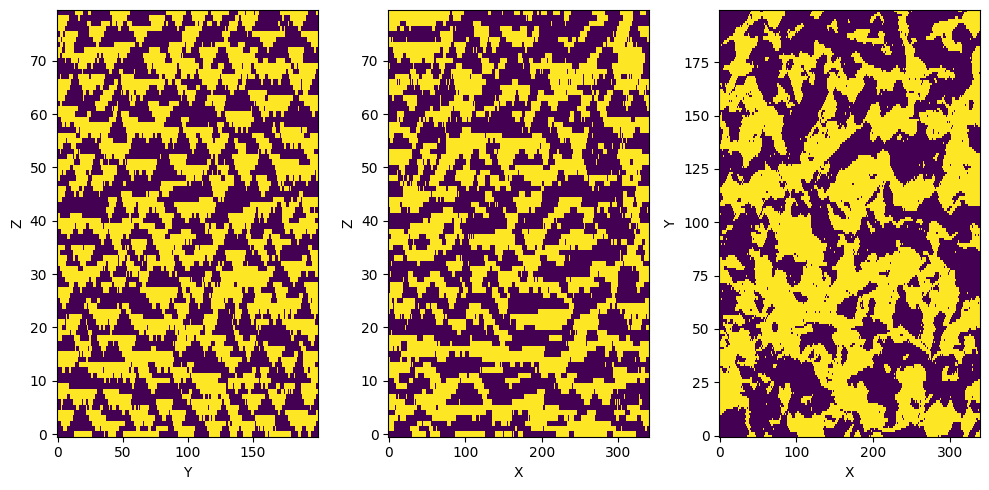

In [5]:
plot_3_faces(mauls,50,50,10)

In [6]:
w=interact_manual(plot_3_faces,
                  cube = fixed(mauls),
                  x = (int(mauls.X.min()), int(mauls.X.max())),
                  y = (int(mauls.Y.min()), int(mauls.Y.max())),
                  z = (int(mauls.Z.min()), int(mauls.Z.max()))
                 )

interactive(children=(IntSlider(value=169, description='x', max=339), IntSlider(value=99, description='y', max…